In [1]:
from keras.datasets import boston_housing

/home/rohit/anaconda3/envs/fastai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
train_labels[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [4]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [5]:
test_data.shape

(102, 13)

In [6]:
from keras import layers
from keras import models

In [7]:
len(train_data[0])

13

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /=std

In [9]:
x_val = train_data[:100]
y_val = train_labels[:100]
partial_x_train = train_data[100:]
partial_y_train = train_labels[100:]

In [10]:
train_data.shape[1]

13

In [11]:
network = models.Sequential()

network.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1))

network.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [44]:
history = network.fit(partial_x_train, partial_y_train, batch_size=16, epochs=100, validation_data=(x_val, y_val))

Train on 304 samples, validate on 100 samples
Epoch 1/100
304/304 [==============================] - 0s 249us/step - loss: 1.7161 - mean_absolute_error: 0.9825 - val_loss: 7.7302 - val_mean_absolute_error: 1.9252
Epoch 2/100
304/304 [==============================] - 0s 239us/step - loss: 1.3914 - mean_absolute_error: 0.8432 - val_loss: 7.5059 - val_mean_absolute_error: 1.8584
Epoch 3/100
304/304 [==============================] - 0s 229us/step - loss: 1.1803 - mean_absolute_error: 0.7678 - val_loss: 7.5366 - val_mean_absolute_error: 1.8623
Epoch 4/100
304/304 [==============================] - 0s 237us/step - loss: 1.1119 - mean_absolute_error: 0.7409 - val_loss: 7.5702 - val_mean_absolute_error: 1.8655
Epoch 5/100
304/304 [==============================] - 0s 231us/step - loss: 1.0456 - mean_absolute_error: 0.7202 - val_loss: 7.5635 - val_mean_absolute_error: 1.8646
Epoch 6/100
304/304 [==============================] - 0s 242us/step - loss: 1.0007 - mean_absolute_error: 0.7034 - val

304/304 [==============================] - 0s 231us/step - loss: 0.8271 - mean_absolute_error: 0.6222 - val_loss: 7.8224 - val_mean_absolute_error: 1.8775
Epoch 50/100
304/304 [==============================] - 0s 232us/step - loss: 0.8275 - mean_absolute_error: 0.6113 - val_loss: 7.9228 - val_mean_absolute_error: 1.9142
Epoch 51/100
304/304 [==============================] - 0s 242us/step - loss: 0.8080 - mean_absolute_error: 0.6090 - val_loss: 7.8124 - val_mean_absolute_error: 1.8844
Epoch 52/100
304/304 [==============================] - 0s 233us/step - loss: 0.8018 - mean_absolute_error: 0.6149 - val_loss: 7.8011 - val_mean_absolute_error: 1.8761
Epoch 53/100
304/304 [==============================] - 0s 226us/step - loss: 0.7964 - mean_absolute_error: 0.6023 - val_loss: 7.9092 - val_mean_absolute_error: 1.9128
Epoch 54/100
304/304 [==============================] - 0s 232us/step - loss: 0.7893 - mean_absolute_error: 0.6007 - val_loss: 7.8836 - val_mean_absolute_error: 1.8953
Epoch

Epoch 98/100
304/304 [==============================] - 0s 226us/step - loss: 0.6928 - mean_absolute_error: 0.5561 - val_loss: 8.0923 - val_mean_absolute_error: 1.9401
Epoch 99/100
304/304 [==============================] - 0s 223us/step - loss: 0.7433 - mean_absolute_error: 0.5862 - val_loss: 8.0054 - val_mean_absolute_error: 1.9042
Epoch 100/100
304/304 [==============================] - 0s 230us/step - loss: 0.7069 - mean_absolute_error: 0.5763 - val_loss: 8.0455 - val_mean_absolute_error: 1.9033


In [45]:
network.evaluate(train_data, train_labels)

404/404 [==============================] - 0s 35us/step


[2.5004731437357344, 0.8899544807943968]

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [48]:
history_dict = history.history

In [49]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [50]:
epochs = range(1, len(loss_values)+1)

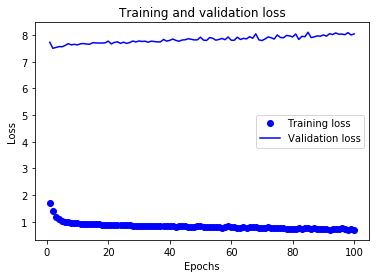

In [51]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [52]:
acc_values = history_dict['mean_absolute_error']
val_acc_values = history_dict['val_mean_absolute_error']

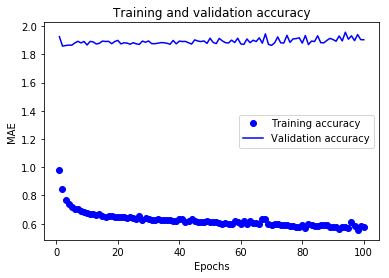

In [55]:
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [46]:
predictions[0].argmax()

3